In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from numpy.random import normal, uniform, seed
import numpy as np
%matplotlib inline

In [17]:
with open('data_sigma_normal_130+50_2_20_100-Copy1.pkl', 'rb') as pickle_file:
    plot_array = pickle.load(pickle_file)
with open('data_sigma_normal_130+50_2_20_100times_run.pkl', 'rb') as pickle_file:
    times_run = pickle.load(pickle_file)

In [18]:
times_run_nozero = np.transpose(np.nonzero(times_run))
print("Total distinct index: %d" % len(times_run_nozero))
max_times = np.amax(times_run)
min_times = np.amin(times_run)
print("Max number of times: %d" % max_times)
print("Min number of times: %d" % min_times)
idx = np.where( times_run == max_times )
idx = zip(*idx)
for item in idx:
    print("At position: %s - %d" % (item, times_run[item[0], item[1]]))
    
print("Total de vezes rodado: %d" % times_run.sum())

#for element in np.transpose(np.nonzero(times_run)):
#    print("%s - %d" %(element, times_run[element[0], element[1]]))

Total distinct index: 8100
Max number of times: 7359
Min number of times: 6652
At position: (12, 22) - 7359
Total de vezes rodado: 57008600


In [40]:
EXPERIMENT = 100
Q = 20
N_MAX = 130
#Q_MAX = 100
SIGMA_MAX = 2.5
SIGMA_MAX_IDX = 100
SIGMA_VAL = np.linspace(0.0001, SIGMA_MAX, SIGMA_MAX_IDX)
N_START = 50
NAME_SIGMA = "data_sigma_normal_%d+%d_%d_%d_%d" %(N_MAX, N_START, SIGMA_MAX, Q, EXPERIMENT)
NAME_SIGMA_PNG = NAME_SIGMA + '.png'
NAME_PNG_SCATTER = NAME_SIGMA + '_scatter.png'
NAME_TR_SIGMA_PNG = NAME_SIGMA + '_times_run.png'
print(NAME_SIGMA_PNG)

data_sigma_normal_130+50_2_20_100.png


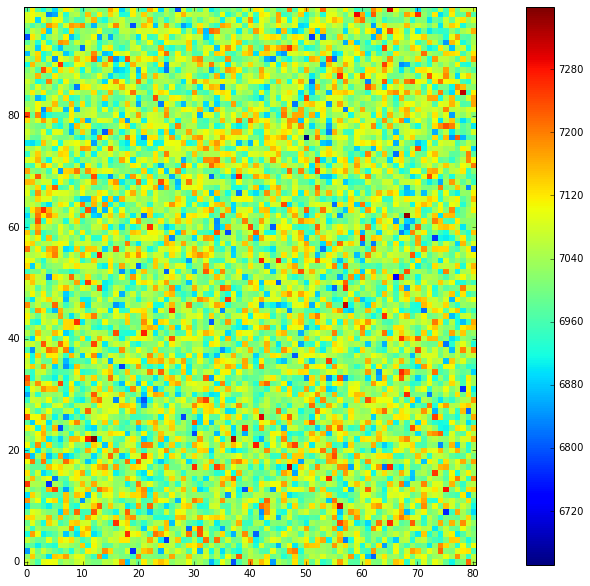

In [41]:
fig, ax = plt.subplots(figsize=(18, 10))
cmap = plt.cm.get_cmap('jet')
im = ax.imshow(times_run.T, cmap=cmap, interpolation="nearest")
               #, 
               #clim=(-0.2,0.2), extent=[11,110,100,0])
#plt.xlim(30, 82)
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.savefig('%s' % NAME_TR_SIGMA_PNG)
plt.show()  # isso mostra os gráficos

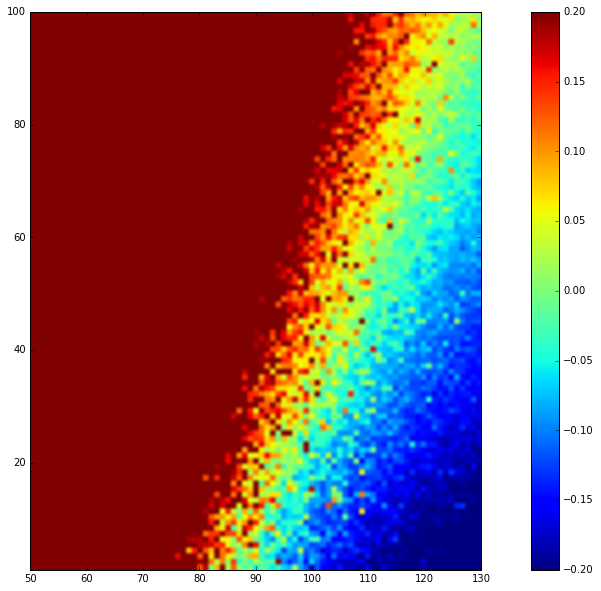

In [43]:
fig, ax = plt.subplots(figsize=(18, 10))
cmap = plt.cm.get_cmap('jet')
im = ax.imshow(plot_array.T, cmap=cmap, interpolation="hanning", clim=(-0.2,0.2), extent=[50,130,100,1])
#plt.xlim(60, 130)
plt.gca().invert_yaxis()
plt.colorbar(im)
plt.savefig('%s' % NAME_SIGMA_PNG)
plt.show()  # isso mostra os gráfico

In [44]:
import itertools

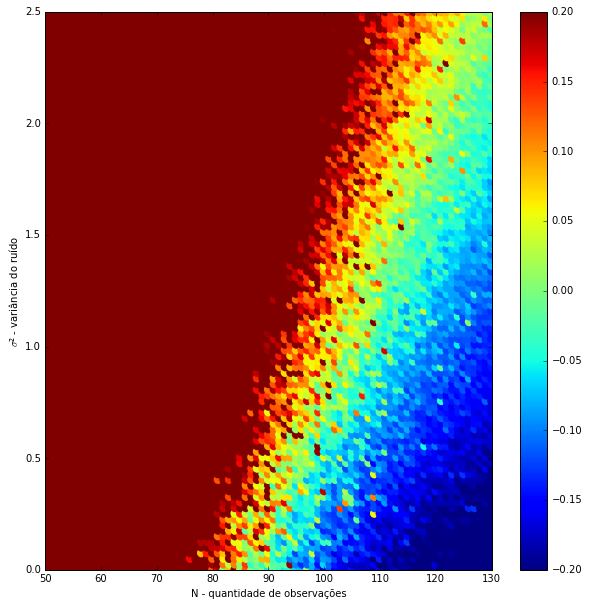

In [48]:
x = range(50,131)
y = SIGMA_VAL
xy = itertools.product(x, y)
x, y = zip(*list(xy))
x = list(x)
y = list(y)
colors = plot_array
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.get_cmap('jet')
sc = ax.scatter(x, y, c=colors, vmin=-0.2, vmax=0.2, s=80, cmap=cmap, linewidth=0)
plt.colorbar(sc)
plt.xlim(50, 130)
plt.ylim(0, 2.5)
plt.xlabel("N - quantidade de observações")
plt.ylabel(r'$\sigma$² - variância do ruído')
plt.savefig('%s' % NAME_PNG_SCATTER)